<a href="https://colab.research.google.com/github/nohaelmougi/Gradient-Descent-Optimizers/blob/main/Ecommerce_Consumer_Behavior_Analysis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

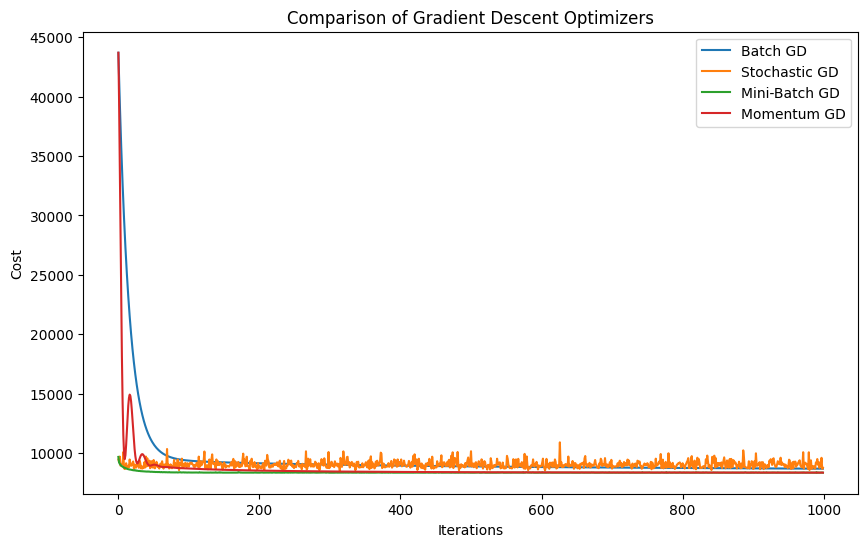

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/Ecommerce_Consumer_Behavior_Analysis_Data.csv")

# Convert 'Purchase_Amount' to numeric (removing "$" and converting to float)
df["Purchase_Amount"] = df["Purchase_Amount"].replace('[\$,]', '', regex=True).astype(float)

# Select relevant numerical features
numerical_features = [
    "Age", "Frequency_of_Purchase", "Brand_Loyalty", "Product_Rating",
    "Time_Spent_on_Product_Research(hours)", "Return_Rate",
    "Customer_Satisfaction", "Time_to_Decision"
]

# Select categorical features to encode
categorical_features = ["Gender", "Income_Level", "Marital_Status", "Education_Level",
                        "Occupation", "Purchase_Channel", "Device_Used_for_Shopping",
                        "Payment_Method", "Shipping_Preference"]

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

# Combine numerical and encoded categorical features
X = pd.concat([df_scaled, df_encoded], axis=1).values.astype(float)
y = df["Purchase_Amount"].values.astype(float)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias term (intercept) to X
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Ensure data types are float
y_train = y_train.astype(float)
y_test = y_test.astype(float)
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Initialize parameters
alpha = 0.01  # Learning rate
beta = 0.9    # Momentum coefficient
num_iterations = 1000
m_train = len(y_train)
theta_init = np.zeros(X_train.shape[1])

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Batch Gradient Descent (BGD)
def batch_gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index]
            gradient = xi.T.dot(xi.dot(theta) - yi)
            theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Mini-Batch Gradient Descent (MBGD)
def mini_batch_gradient_descent(X, y, theta, alpha, iterations, batch_size=10):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled, y_shuffled = X[indices], y[indices]
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            gradient = (1 / len(y_batch)) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Momentum Gradient Descent (MGD)
def momentum_gradient_descent(X, y, theta, alpha, beta, iterations):
    m = len(y)
    cost_history = []
    v = np.zeros_like(theta)  # Initialize velocity
    for _ in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
        v = beta * v + alpha * gradient
        theta -= v
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Run all optimizers
theta_bgd, cost_bgd = batch_gradient_descent(X_train, y_train, theta_init.copy(), alpha, num_iterations)
theta_sgd, cost_sgd = stochastic_gradient_descent(X_train, y_train, theta_init.copy(), alpha, num_iterations)
theta_mbgd, cost_mbgd = mini_batch_gradient_descent(X_train, y_train, theta_init.copy(), alpha, num_iterations)
theta_mgd, cost_mgd = momentum_gradient_descent(X_train, y_train, theta_init.copy(), alpha, beta, num_iterations)

# Plot cost function convergence
plt.figure(figsize=(10, 6))
plt.plot(cost_bgd, label='Batch GD')
plt.plot(cost_sgd, label='Stochastic GD')
plt.plot(cost_mbgd, label='Mini-Batch GD')
plt.plot(cost_mgd, label='Momentum GD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Comparison of Gradient Descent Optimizers')
plt.legend()
plt.show()
